In [2]:

# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [27]:
df = pd.read_csv('train.csv')

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

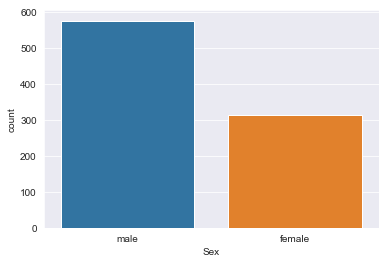

In [28]:
sns.countplot('Sex',data=df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

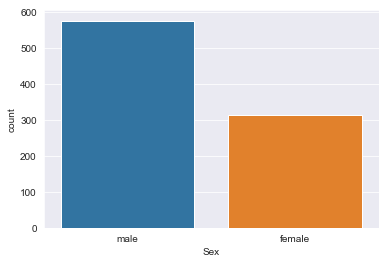

In [19]:
# what is the 
# break from the original - using factorplot breaks sns. The new way is to use countplot.
sns.countplot(x='Sex',data=df)

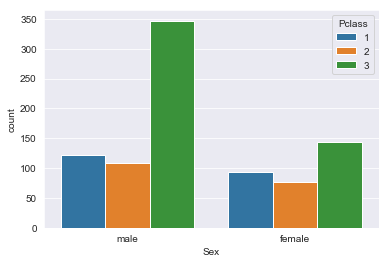

In [18]:
# What Passenger class were they?
sns.countplot(x='Sex',data=df,hue='Pclass')

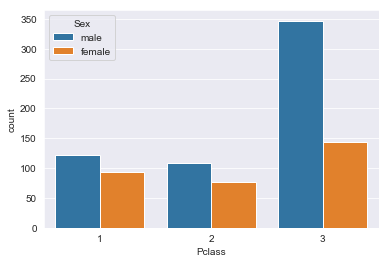

In [20]:
# flip this around: find pclass, then hue on sex
sns.countplot(x='Pclass',data=df,hue='Sex')

In [21]:
# how many were children?
# use .apply() to use a function to update a new column
def mfc(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
    

In [30]:
# create a new columns called 'person'
# use axis=1 on .apply to indicate columns, not indexes
df['person'] = df[['Age','Sex']].apply(mfc,axis=1)

In [32]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


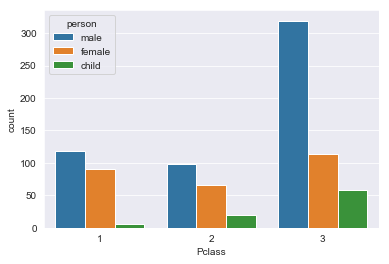

In [34]:
# now we can have the countplot show children as well as men and women
sns.countplot('Pclass',data=df,hue='person')

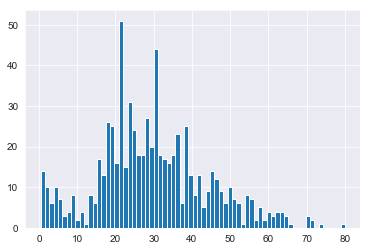

In [36]:
# plot a histogram of ages
df['Age'].hist(bins=70)

In [37]:
# find the mean age
df['Age'].mean()

29.69911764705882

In [38]:
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

## Creating a facetGrid of the ages:


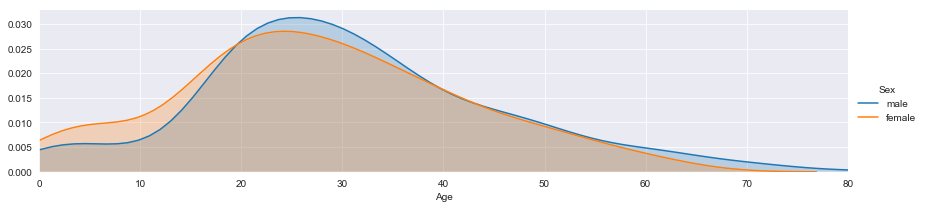

In [41]:
# set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# use .map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit for the oldest passenger
oldest = titanic_df['Age'].max()

# Setting x lower limit at 0 (no negative ages)
fig.set(xlim=(0,oldest))

fig.add_legend()

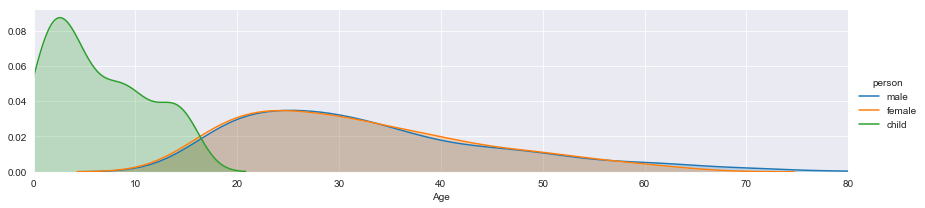

In [42]:
# now use the person column for the hue
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

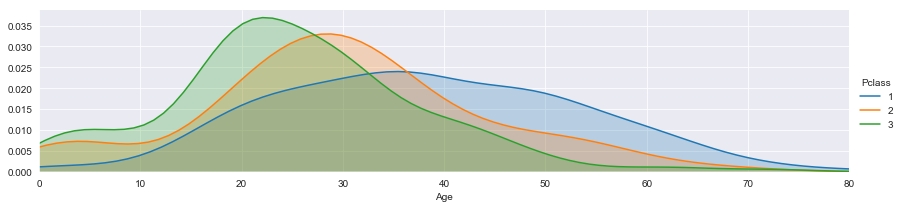

In [43]:
# Do the same for class
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [45]:
# What deck were the passengers on?
# creating a new object called 'deck' and drop all the NaNs
deck = df['Cabin'].dropna()

In [46]:
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object